# Analysing the Iris dataset
In the code cells below I use the Python programming language to investigate the popular Iris dataset and perform various analyses on it. Preceding each code cell is a markdown cell, whcih explains what the code cell aims to do. Also in each code cell are comments (# displayed like this) which are hopefully helpful in understanding each code block.

### Importing the necessary libraries and packages
In the code cell below, I import all Python libraries and packages that I will use in this notebook.

In [23]:
import pandas as pd
import numpy as np
from scipy import stats as st
import os
import matplotlib.pyplot as plt
from itertools import combinations

### Loading in the Iris dataset
In the code cell below, I load the Iris dataset into this notebook and store it as a Pandas Dataframe, 'data'.

Importing the data into a Pandas Dataframe [makes the data flexible and customisable and makes available an extensive set of features](https://data-flair.training/blogs/advantages-of-python-pandas/). You can learn about Dataframes [here](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html).

In my github repository I have saved a .zip file containing a .data file called iris.data. After extracting this folder into a location of your choice on your machine, we need to quickly open the file to check one important detail - whether the values are separated by commas or not.

This is important as it will determine the method for importing the dataset. You can find more information on this [here](https://www.shanelynn.ie/using-pandas-dataframe-creating-editing-viewing-data-in-python/).

It looks like the values are separated by spaces rather than commas or anything else, so I initially used the the Pandas library's .read_csv funtion in order to load in the file, setting the delim_whitespace argument to True. Both [this earlier referenced tutorial](https://www.shanelynn.ie/using-pandas-dataframe-creating-editing-viewing-data-in-python/) and the [official Pandas documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.read_csv.html) will provide further explanation and context on this if you need.

However, the resulting output was incorrect, and I could the values were separated by commas, so I removed the delim_whitespace argument, meaning that it would be set to the defaut value of a comma ','. This returned the output I was looking for.

#### Output




In [24]:
# using the Pandas library's read_csv function to read the iris.data file into a Pandas DataFrame
# I have stored the iris.data file in the current working directory, so I use the os module to change to that directory
os.chdir('C:/Users/fmtie/OneDrive/Desktop/pands/pands-project')
# now I can easily call the iris.data file by its name rather than specifying the entire path
# As mentioned above, I don't specify the delimiter, and the function will automatically take it that it is a comma
# I also specify the column names that I want to use for the DataFrame by using the name argument
# The feature names 'sepal_length', 'sepal_width', 'petal_length', 'petal_width', and the fifth column is a categoriacal value corresponding to the species of iris flower
# I was able to find the column names in the iris.names file, which is contained in the same zip foler as the iris.data file

data = pd.read_csv('iris.data', header=None, names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species'])

# I call the data variable in order to view its contents
data

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


### Outputting a brief summary of each variable to a text file
In the code cell below I output a brief summary of each variable to a text, summary.txt.

[This article](https://openelectiondata.net/en/academy/a-gentle-introduction-to-summarizing-data/) describes a very simple but effective two-pronged approach to summarising a dataset. The author suggests calculating some values to describe the center of the data, firstly, and secondly calculating the spread of values around the center. These are referred to as the measure of central tendency and the measure of dispersion, respectively. With this approach in mind I calculate three summary statistics for the center of the data (mode, median and mean) and three for the spread of the data (range, standard deviation and variance).

I found [this post](https://stackoverflow.com/questions/43160381/printing-summary-of-results-in-python) in stack overflow that discussed using a for loop to go through member data and print summaries of that data. I decided to try and replicate this approach, looping through the columns, i.e variables, in my dataframe and using numpy functions to calculate my summary statistics for each.

I also worked from [this article](https://www.geeksforgeeks.org/writing-to-file-in-python/) to understand how to incorporate the file writing element into my for loop, and [this article](https://www.geeksforgeeks.org/os-module-python-examples/) in order to understand how to use the os module to save my summary.txt file into the correct location.

I used the numpy library's built in aggregation funtions to calculate the mean, median, min, max, standard dev, and variance stats. To calculate the mode of each variable, I had to use scipy's .mode() function, and to calculate the range, I worked from [this resource](https://www150.statcan.gc.ca/n1/edu/power-pouvoir/ch12/5214890-eng.htm), which told me I needed to first calculate and then subtract the maximum value from the minimum value, which I calulcated individually using numpys built in .max() and .min() functions.




In [25]:
# calculating each summary statistic for the each variable using a for loop and writing this to a text file

# I use the os.path.join() function to create the full path to the summary.txt file
summary_file_path = os.path.join(current_directory, 'summary.txt')

# creating the text file
with open(summary_file_path, 'w') as f:
    # defining the for loop to iterate through each column in the DataFrame, ensuring it only includes numeric columns
    for column in data.select_dtypes(include=[np.number]).columns:
        f.write(f"Summary statistics for {column}:\n")
        # using numpy .mean() and .median() fucntions to calculate the summary statistics for each numeric column, as well as
        # scipy's stats module to calculate the mode
        f.write(f"Mean: {data[column].mean()}\n")
        f.write(f"Median: {data[column].median()}\n")
        f.write(f"Mode: {st.mode(data[column])}\n")
        # calculating the standard deviation, range, and variance using the numpy functions .std(), .var(), and .max() and .min()
        f.write(f"Standard Deviation: {data[column].std()}\n")
        f.write(f"Range: {(data[column].max() - data[column].min())}\n")
        f.write(f"Variance: {data[column].var()}\n")
        f.write("\n")

# The summary statistics for each variable are now written to the summary.txt file in the current working directory




### Outputting and saving a histogram of each variable as .png files
In the code cells below, I output a histogram of each variable as a png file and save it to the current working directory.

To do this, I use the plotting library, [matplotlib](https://matplotlib.org/stable/api/pyplot_summary.html).

I thought it would be neater to generate one .png file with the four histograms depicted in it. In Wes McKinney's 'Python for Data Analysis', he also suggests a way of plotting that is much neater by using figures and subplots. This is on page 283 - 286 of the book. I use that method in order to make the code as concise as possible.

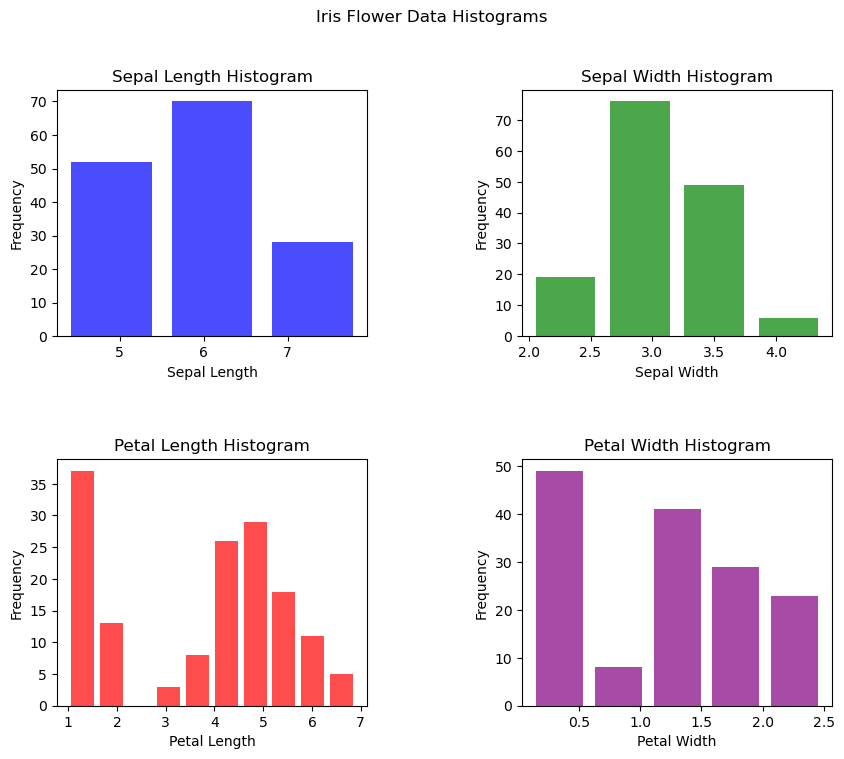

In [26]:
# plots in matplotlib reside in a figure object, so I create that first
# this will allow me to create multiple plots in the same figure, or .png file, as discussed above
# I specify the size of the figure in inches using the figsize argument, to ensure it's big enough to display all the plots clearly
fig = plt.figure(figsize=(10, 8))

# creating the four subplots and specifying the size and postiion of each
ax1 = fig.add_subplot(2, 2, 1)
ax2 = fig.add_subplot(2, 2, 2)
ax3 = fig.add_subplot(2, 2, 3)
ax4 = fig.add_subplot(2, 2, 4)

# now I create a histogram for each of the four numeric variables in the DataFrame
# I play around with the number of bins to see which gives the best insight into the distribution of the data, and set the width so they are clear using the rwidth argument
# I also specify the color and transparency of each histogram using the color and alpha arguments
ax1.hist(data['sepal_length'], bins=3, rwidth=0.8, color='blue', alpha=0.7)
ax2.hist(data['sepal_width'], bins=4, rwidth=0.8, color='green', alpha=0.7)
ax3.hist(data['petal_length'], bins=10, rwidth=0.8, color='red', alpha=0.7)
ax4.hist(data['petal_width'], bins=5, rwidth=0.8, color='purple', alpha=0.7)

# I also add titles and labels to each of the subplots using the set_title(), set_xlabel(), and set_ylabel() methods
ax1.set_title('Sepal Length Histogram')
ax1.set_xlabel('Sepal Length')
ax1.set_ylabel('Frequency')
ax2.set_title('Sepal Width Histogram')
ax2.set_xlabel('Sepal Width')
ax2.set_ylabel('Frequency')
ax3.set_title('Petal Length Histogram')
ax3.set_xlabel('Petal Length')
ax3.set_ylabel('Frequency')
ax4.set_title('Petal Width Histogram')
ax4.set_xlabel('Petal Width')
ax4.set_ylabel('Frequency')

# I also add a main title to the figure using the suptitle() method
fig.suptitle('Iris Flower Data Histograms')

# I save the figure to a .png file in the current working directory using the savefig() method
#fig.savefig('iris_histograms.png')

# I also show the figure using the show() method, which will display the figure in a window, just to check that everything looks correct
#plt.show()

# the spacing around my plots is a bit tight and the titles are getting cut off, so I use the fig.subplots_adjust() method to adjust the spacing
# Wes McKinney outlines this method on page 287 of his book, which I've referenced in the above markdown cell
fig.subplots_adjust(hspace=.5, wspace=.5)

plt.show()

# saving adjusted version of the figure to a .png file in the current working directory
fig.savefig('iris_histograms.png')






### Outputting a scatter plot of each pair of variables in the dataset
Seeing as the for loop and figure/subplots approach was so effective in the previous section, I decided to attempt the same approach in the code cells below. I asked Copilot for a steer as to how I would iterate through the variable and create a scatter plot for each pair, adding each to a figure as I did above. You can read that conversation [here](https://copilot.microsoft.com/shares/GkqXtdLznbhsPmxj2G8iG).

Copilot suggested that I use the itertools library's combinations package. I hadn't used this before so read up on it [here](https://docs.python.org/3/library/itertools.html#itertools.combinations). After creating a subset of my dataset only containing columns with numerical data, i.e only the columns with the feature measurements for each feature (petal length/width, sepal length/width), I could use itertools to list all the possible combinations of these numerical columns.

I had to ask Copilot for further explanation on the following piece of code, and that extended conversation is [here](https://copilot.microsoft.com/shares/oFB4RwGR6GpxZX7SCHBxn).

   for i, (x_var, y_var) in enumerate(pairs, 1):
    ax = fig.add_subplot(len(pairs) // 2 + 1, 2, i)  # Adjusting subplot layout
    ax.scatter(df[x_var], df[y_var])
    ax.set_xlabel(x_var)
    ax.set_ylabel(y_var)
    ax.set_title(f"{x_var} vs {y_var}")

I read up on the enumerate() function [here](https://www.w3schools.com/python/ref_func_enumerate.asp) to gain a better understanding of the operation, and came to understand that this intial part of the for loop simply assigns an index, or position, to each variable pair in order to facilitate the positioning of the subplot in the figure. [This article](https://www.dataquest.io/blog/tutorial-advanced-for-loops-python-pandas/) was critical in helping me to understand how the for loop iterated through the tuple, column_combinations. The article also discusses plotting with for loops using the Iris dataset, which is exactly what I was aiming to do below, and was very helpful as a result.

Initally, the points were not coloured by species, so I used the [.map()](https://www.w3schools.com/python/ref_func_map.asp) method to colour the points.

[('sepal_length', 'sepal_width'), ('sepal_length', 'petal_length'), ('sepal_length', 'petal_width'), ('sepal_width', 'petal_length'), ('sepal_width', 'petal_width'), ('petal_length', 'petal_width')]


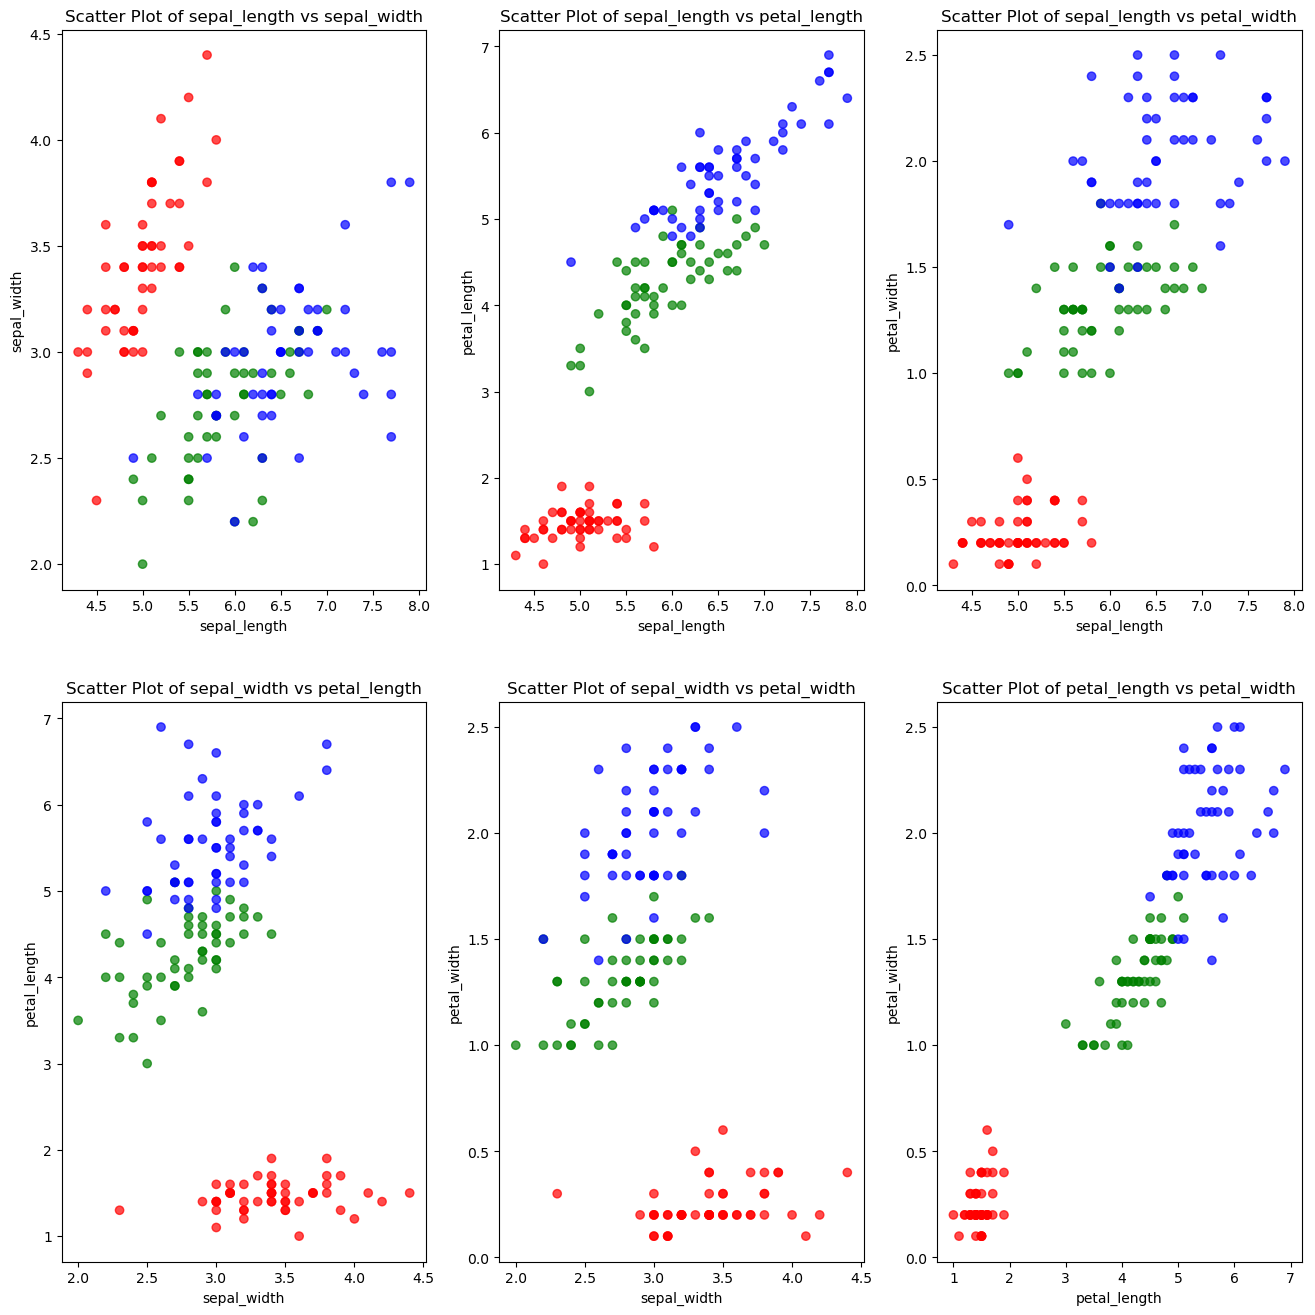

In [27]:
# Firstly, I create a subset of my dataset only containing the numerical columns so I can calculate all possible pairings of the numeric variables using itertools
numeric_data = data.select_dtypes(include=[np.number])

# I then use the combinations() function from the itertools module to create all possible pairings of the numeric variables
# The '2' argument specifies that I want to create pairings of two variables at a time
column_combinations = list(combinations(numeric_data.columns, 2))

# checking the column combinations
print(column_combinations)

fig2 = plt.figure(figsize=(16, 16))

# executing the for loop by iterating through the column combinations and assigning each combination to the variables v1 and v2
# then I create a scatter plot for each combination using the scatter() method
# I also specify the color of each point in the scatter plot using the map() method to map the species to a color
for i, (v1, v2) in enumerate(column_combinations):
    # I allow for all 6 combinations by specifying a 2 x 3 grid of subplots
    ax = fig2.add_subplot(2, 3, i + 1)
    ax.scatter(numeric_data[v1], numeric_data[v2], alpha=0.7, color=data['species'].map(colors))
    ax.set_xlabel(v1)
    ax.set_ylabel(v2)
    ax.set_title(f'Scatter Plot of {v1} vs {v2}')

plt.show()

fig2.subplots_adjust(hspace=.8, wspace=.8)

fig2.savefig('iris_scatter_plots.png')
